# Thresholding algorithms

I will try to implement the thresholding algorithms for star pattern identification in star tracker algorithm. The references for this process are
provided by Mr. Heshmat and I will be following them as best as I can.

There are several methods that can be used for thresholding to identify stars in an image. _Thresholding_ can be
defined as the separation of light and dark regions in an image. 

If $g(x, y)$ is a threshold of some function $f(x, y)$ for some global threshold $T$, 
$ g(x, y) = 1$ if $f(x, y) \ge T$ and $g(x, y) = 0$ otherwise.

In [1]:
!pip install opencv-python

## Loading the data from an image

In [2]:
import numpy as np

In [3]:
from cv2 import imread

In [4]:
data = imread("image_1.bmp")

In [5]:
data

array([[[ 3,  3,  3],
        [ 5,  5,  5],
        [ 3,  3,  3],
        ...,
        [ 2,  2,  2],
        [12, 12, 12],
        [ 7,  7,  7]],

       [[10, 10, 10],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [ 8,  8,  8],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[ 5,  5,  5],
        [ 2,  2,  2],
        [ 8,  8,  8],
        ...,
        [ 6,  6,  6],
        [11, 11, 11],
        [ 7,  7,  7]],

       ...,

       [[ 2,  2,  2],
        [10, 10, 10],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 6,  6,  6],
        [ 5,  5,  5],
        [19, 19, 19],
        ...,
        [ 4,  4,  4],
        [ 2,  2,  2],
        [ 1,  1,  1]],

       [[ 2,  2,  2],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [12, 12, 12],
        [10, 10, 10],
        [ 4,  4,  4]]], dtype=uint8)

In [6]:
type(data)

numpy.ndarray

The data is not loaded from the `.mat` files shared by Heshmat and the `Dnew` column containing the actual
image matrix with associated intensities is extracted and saved in the variable. Now, I will try different methods from the reference [1] 

### Obtaining histogram of the image

Obtaining the __histogram__ of an image seems to be an important step in thresholding process. Let us see how
the histogram can be obtained from an image's pixel values saved as a numpy array.

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
hist, bins = np.histogram(data, 256, [0,256])

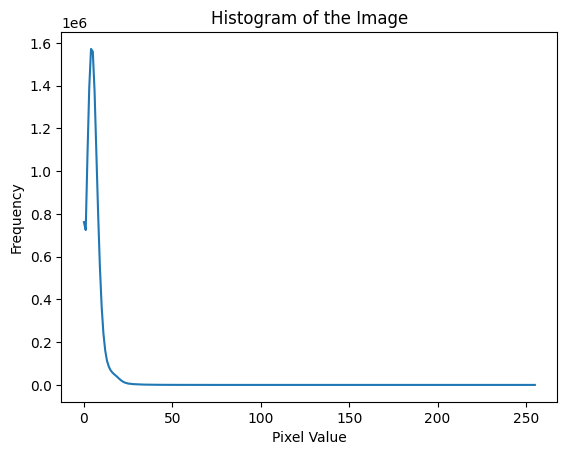

In [10]:
# Plot the histogram
plt.plot(hist)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Image')
plt.show()

In [11]:
hist.size

256

In [12]:
np.mean(hist)

np.float64(48000.0)

### Using OpenCV for thresholding

`OpenCV` library for python provided a lot of image processing tools. One such tools provided by this library
is thresholding. It provides codes for both global and adaptive filtering. Depending on the case at hand, we can choose between the two.

### Otsu's method for thresholding

In [13]:
import cv2 as cv

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

In [16]:
img = cv.imread("image_1.bmp", cv.IMREAD_GRAYSCALE)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
# blur = cv.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# plot all the images and their histograms
# images = [img, 0, th1,
#           img, 0, th2,
#           blur, 0, th3]
# titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
#           'Original Noisy Image','Histogram',"Otsu's Thresholding",
#           'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
# for i in range(3):
#     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
# plt.show()

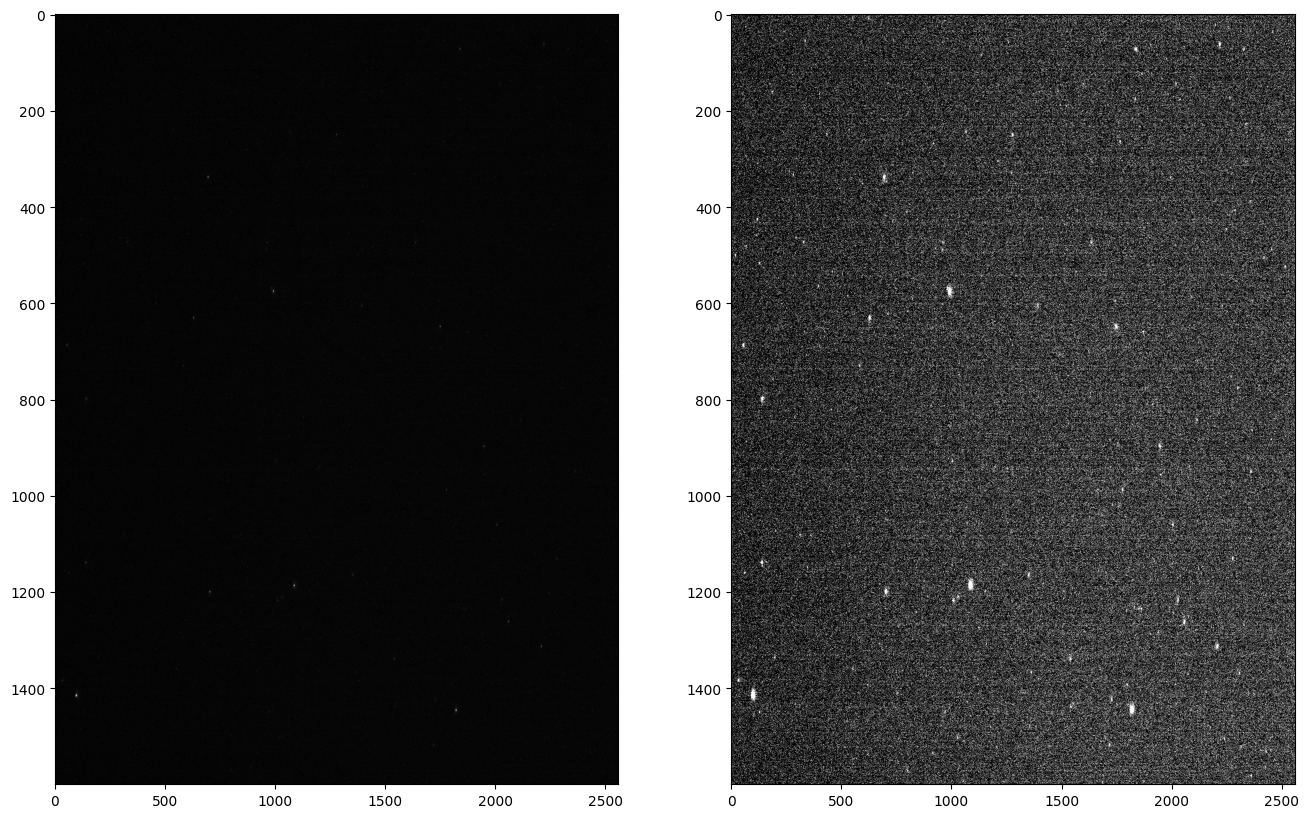

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 10))

im1 = ax1.imshow(img, 'gray', aspect='auto')

im2 = ax2.imshow(th2, 'gray', aspect='auto')
plt.show()

### Adaptive thresholding

In [18]:
%matplotlib inline

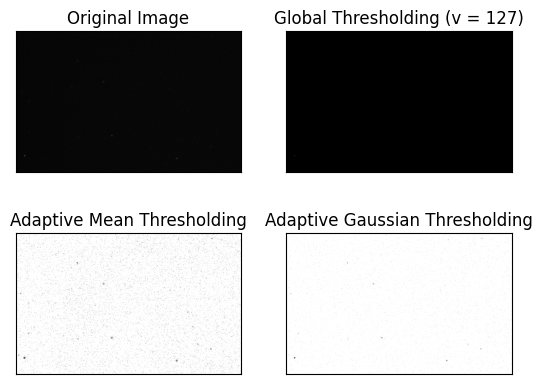

In [19]:
img = cv.imread("image_1.bmp", cv.IMREAD_GRAYSCALE)
# assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Thresholding using local adaptive and PIV methods

For this section, I am referring to thresholding methods described in [2]. 

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [21]:
%matplotlib inline

In [22]:
# Loading the image
# img = cv.imread("image_1.bmp", cv.IMREAD_GRAYSCALE)
img = cv.imread("image_1.bmp", cv.IMREAD_GRAYSCALE)

In [23]:
# some info about the image
print(f"Type: {type(img)}\nShape: {img.shape}")

Type: <class 'numpy.ndarray'>
Shape: (1600, 2560)


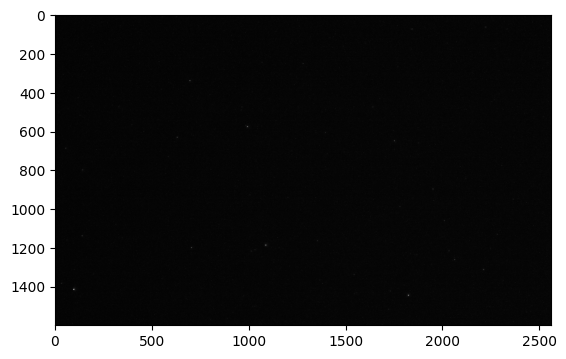

In [24]:
# view the image
plt.imshow(img, cmap='gray')
plt.show()

Integral density at every pixel can be calculated as 
$$
g(x, y) = \sum_{i=1}^{x}\sum_{j=1}^{y}I(i, j)
$$

Further simplification yields, 
$$
g(x, y) = I(x, y) + g(x, y -1) + g(x -1, y ) - g(x-1, y-1)
$$

For $ x = 2\ldots m,\; y = 2\ldots n$

First, we calculate the integral image from a binary image using above formula. 

In [25]:
integral_image = np.zeros(img.shape)

In [26]:
m = integral_image.shape[0]
n = integral_image.shape[1]

In [27]:
for x in range(2, m):
    for y in range(2, n):
        integral_image[x, y] = img[x, y] + integral_image[x, y - 1] + integral_image[x - 1, y] - integral_image[x - 1, y - 1]

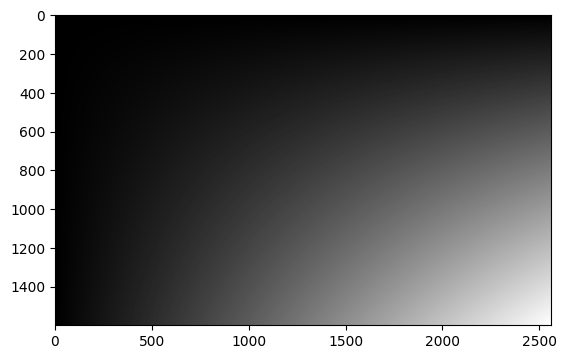

In [28]:
plt.imshow(integral_image, cmap='grey')
plt.show()

Now, we need to calculate the sum of the local pixel group in the window. It is denoted by $s(x,y)$. It can be obtained in two steps as follows:
$$
s(x, y)=\sum_{i=x-c}^{x+c} \sum_{j=y-c}^{y+c} I(i, j)
$$

Here, $c=(w-1)/2$ and hence $w$ is an odd number. 

The local sum $s(x, y)$ of the integral image $g$ can be calculated by using following formula.
$$
s(x,y)=[g(x+d-1, y+d-1)+g(x-d, y-d)]-[g(x-d, y+d-1)+g(x+d-1, y-d)]
$$

Where, $d=w//2$

In [29]:
window_size = 3

In [30]:
local_sum_image = np.zeros(integral_image.shape, dtype=np.uint8)

In [31]:
c = int((window_size - 1) / 2)

In [32]:
local_means = np.zeros(img.shape, dtype=np.uint8)

In [33]:
for x in range(2, m - 2):
    for y in range(2, n - 2):
        local_means[x, y] = np.sum(img[x - c:x + c + 1, y - c: y + c + 1])

In [34]:
d = round(window_size / 2)

In [35]:
for x in range(m-1):
    for y in range(n-1):
        local_sum_image[x, y] = (integral_image[x+d-1, y+d-1] + integral_image[x-d, y-d]) + (integral_image[x-d, y+d-1] + integral_image[x+d-1, y-d])

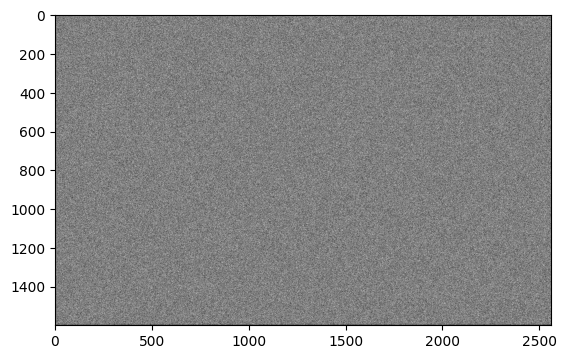

In [36]:
plt.imshow(local_sum_image, cmap='grey')
plt.show()

Now we define the local mean $m(x, y)$ at $(x,y)$ as follows:
$$
m(x, y) = \frac{s(x, y)}{w^2}
$$

And the threshold $T(x, y)$ at each point $(x, y)$ is given by:
$$
T(x, y) = m(x,y) \left[1 + k \left(\frac{\partial(x, y)}{1 - \partial(x, y)} - 1 \right)\right]
$$

Where $\partial(x, y) = I(x,y)-m(x,y)$. Also, the coefficient $k$ had the capability of adjusting the adaptation level of variable threshold and is in a numerical range of $[0, 1]$.

Depending on the type of the initial image, the numerical value of the coefficient $k$ will have an important role in threshold value determination. The lower the value, the higher the threshold value and
vice versa.

It is obvious that if $k=0$ then the threshold value will be equal to the local mean $m(x,y)$. Different values of $k$ allow the controlling of the threshold value adoption rate.

In [37]:
mean_image = (1. / (window_size**2)) * local_means

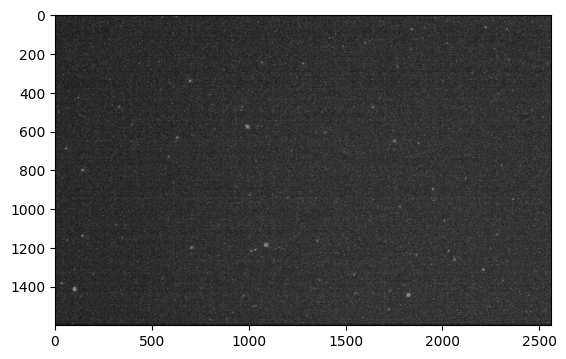

In [38]:
plt.imshow(mean_image, cmap='grey');

In [39]:
threshold_values = np.zeros(mean_image.shape)
k = 0.00000009
for i in range(m):
    for j in range(n):
        gamma = img[i, j] - mean_image[i, j]
        delta = gamma / (1.0000000000001 - gamma)
        threshold_values[i, j] = mean_image[i, j] * (1 + k * (delta - 1))

In [40]:
# plt.imshow(threshold_values, cmap='grey');

In [41]:
thresholded_image = np.zeros(img.shape, dtype=np.uint8)

for i in range(m):
    for j in range(n):
        if img[i, j] > threshold_values[i, j]:
            thresholded_image[i,j] = 255

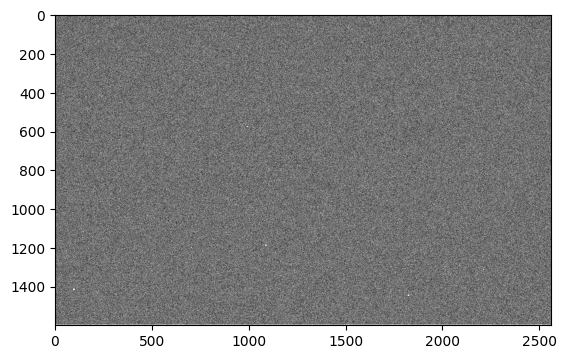

In [42]:
plt.imshow(thresholded_image, cmap='grey')
plt.show()

In [4]:
import matplotlib.pyplot as plt
%matplotlib qtagg

## Clustering using OpenCV

In [13]:
import numpy as np
import cv2 as cv
 
img = cv.imread('image_1.jpg')
Z = img.reshape((-1,3))
 
# convert to np.float32
Z = np.float32(Z)
 
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 9
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
 
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.imshow(res2)
plt.show()
# cv.imshow('res2',res2)
# cv.waitKey(0)
# cv.destroyAllWindows()

qt.qpa.wayland: Creating a fake screen in order for Qt not to crash


In [ ]:
 
cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()

#### References

[1] Lecture 4: Thresholding Bryan C S. Morse, Brigham Young University, 1998–2000

[2] Barzamini, Fahimeh, Shabnam Yazdani, and Jafar Roshanian. "APPLICATION OF STAR TRACKERS FOR SATELLITE ANGULAR RATE ESTIMATION USING LOCAL ADAPTIVE THRESHOLDING AND PIV METHODS."